# 加入了一点物理效果进行测试，需要安装manim-physics插件
参考
[manim-physics](https://github.com/Matheart/manim-physics)

In [1]:
from manim import *
from manim_physics import *

Manim Community v0.17.2

In [2]:
%%manim -ql -v WARNING TwoObjectsFalling
# use a SpaceScene to utilize all specific rigid-mechanics methods
class TwoObjectsFalling(SpaceScene):
    def construct(self):
        # self.add(NumberPlane())
        circle = Circle().shift(UP)
        circle.set_fill(RED, 1)
        circle.shift(DOWN + RIGHT)

        rect = Square().shift(UP)
        rect.rotate(PI / 4)
        rect.set_fill(YELLOW_A, 1)
        rect.shift(UP * 2)
        rect.scale(0.5)

        ground = Line([-4, -3.5, 0], [4, -3.5, 0])
        wall1 = Line([-4, -3.5, 0], [-4, 3.5, 0])
        wall2 = Line([4, -3.5, 0], [4, 3.5, 0])
        walls = VGroup(ground, wall1, wall2)
        self.add(walls)

        self.play(
            DrawBorderThenFill(circle),
            DrawBorderThenFill(rect),
        )
        self.make_rigid_body(rect, circle)  # Mobjects will move with gravity
        self.make_static_body(walls)  # Mobjects will stay in place
        self.wait(5)
        # during wait time, the circle and rect would move according to the simulate updater

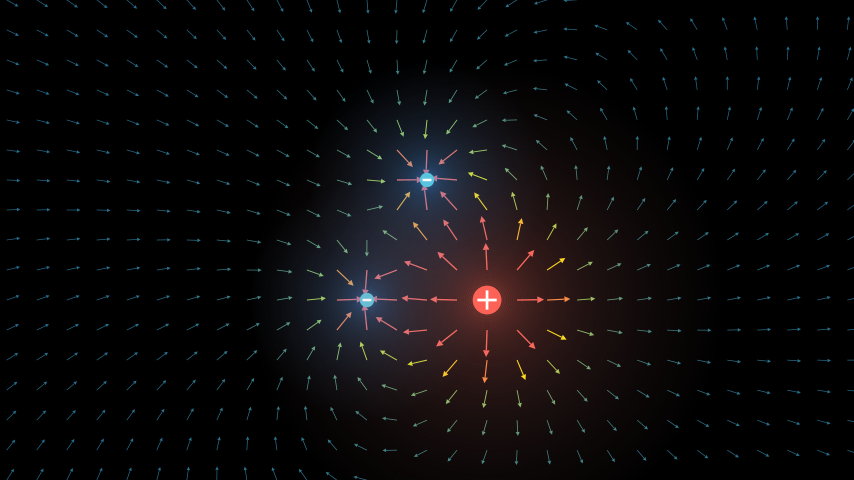

In [3]:
%%manim -ql -v WARNING ElectricFieldExampleScene
class ElectricFieldExampleScene(Scene):
    def construct(self):
        charge1 = Charge(-1, LEFT + DOWN)
        charge2 = Charge(2, RIGHT + DOWN)
        charge3 = Charge(-1, UP)
        field = ElectricField(charge1, charge2, charge3)
        self.add(charge1, charge2, charge3)
        self.add(field)

In [4]:
%%manim -ql -v WARNING RadialWaveExampleScene
class RadialWaveExampleScene(ThreeDScene):
    def construct(self):
        self.set_camera_orientation(60 * DEGREES, -45 * DEGREES)
        wave = RadialWave(
            LEFT * 2 + DOWN * 5, # Two source of waves
            RIGHT * 2 + DOWN * 5,
            checkerboard_colors=[BLUE_D],
            stroke_width=0,
        )
        self.add(wave)
        wave.start_wave()
        self.wait()
        wave.stop_wave()

In [8]:
%%manim -ql -v WARNING MultiPendulumExample
class PendulumExample(SpaceScene):
    def construct(self):
        pends = VGroup(*[Pendulum(i) for i in np.linspace(1, 5, 7)])
        self.add(pends)
        for p in pends:
            self.make_rigid_body(p.bobs)
            p.start_swinging()
        self.wait(10)


class MultiPendulumExample(SpaceScene):
    def construct(self):
        self.add(NumberPlane())
        p = MultiPendulum(RIGHT, LEFT)
        self.add(p)
        self.make_rigid_body(p.bobs)
        p.start_swinging()
        self.add(TracedPath(p.bobs[-1].get_center, stroke_color=BLUE))
        self.wait(10)